# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

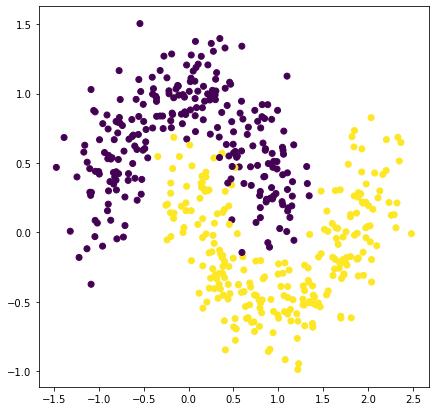

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.figure(figsize=(7, 7))
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

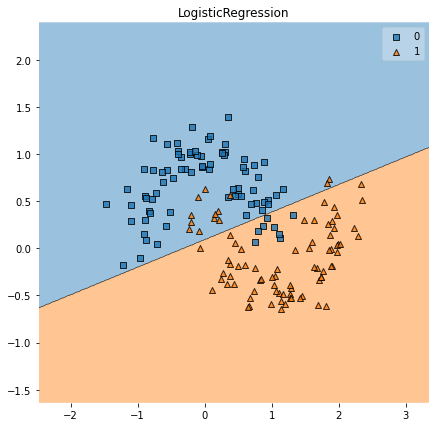

LogisticRegression f1 =  0.8726805173812998


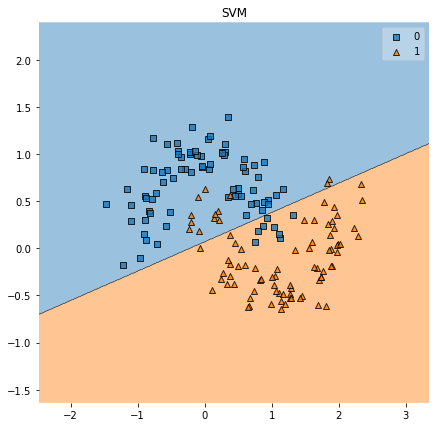

SVM f1 =  0.8726805173812998


In [4]:
lr = LogisticRegression(tol=1e-3) # add some params
svm = SVC(kernel='linear', C=0.8) # here too

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33, random_state=42)

models = zip(['LogisticRegression', 'SVM'], [lr, svm])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.figure(figsize=(7, 7))
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average='weighted'))

Мы использовали линейное ядро, поэтому разделяющая поверхность тоже должна быть линейна.

Однако, обратив внимание не графики, можно понять, что зависимость должна быть нелинейной. Попробуем другие ядра.

## 1.2 Kernel tirck

![keep-calm](https://github.com/girafe-ai/ml-mipt/blob/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

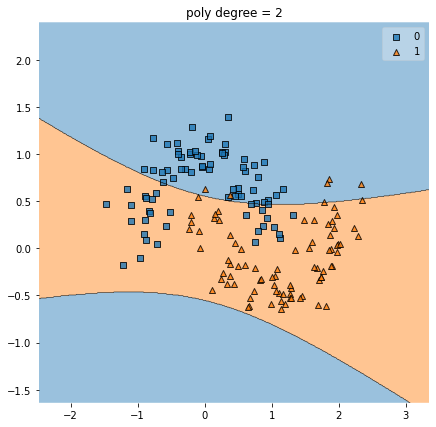

poly degree = 2 f1 =  0.7831008872102698


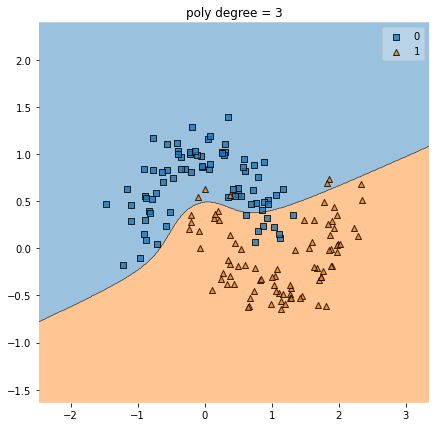

poly degree = 3 f1 =  0.9150640939866728


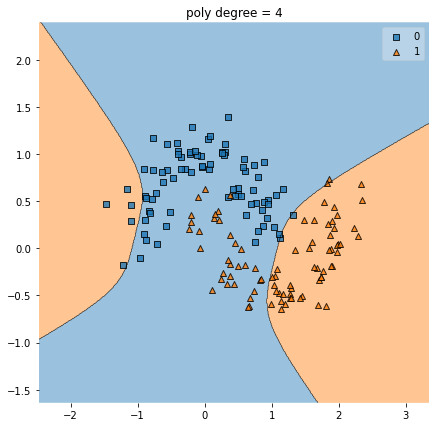

poly degree = 4 f1 =  0.7454729667495624


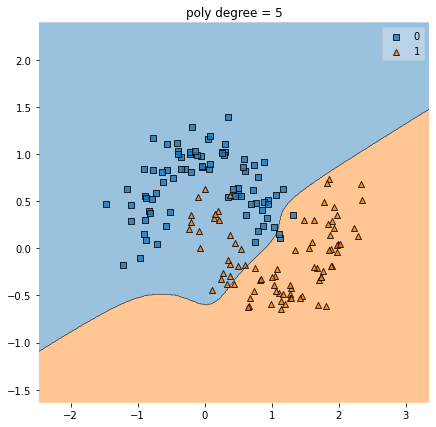

poly degree = 5 f1 =  0.8340642963593783


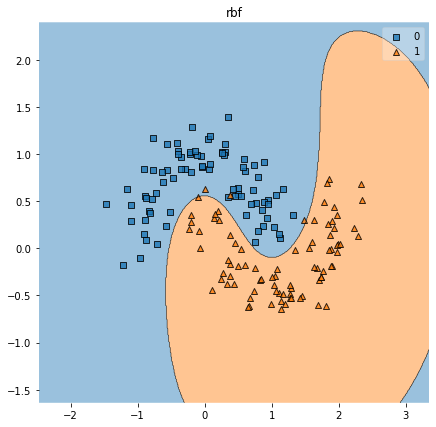

rbf f1 =  0.9757540138380574


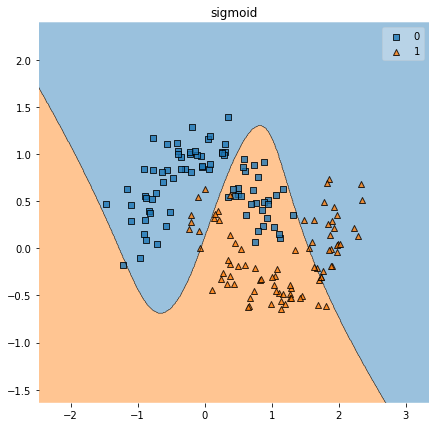

sigmoid f1 =  0.5937902221212901


In [5]:
models = zip(['poly degree = 2', 'poly degree = 3', 'poly degree = 4', 'poly degree = 5', 'rbf', 'sigmoid'], 
             [SVC(kernel='poly', degree=2), SVC(kernel='poly', degree=3), SVC(kernel='poly', degree=4), 
              SVC(kernel='poly', degree=5), SVC(kernel='rbf'), SVC(kernel='sigmoid')])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.figure(figsize=(7, 7))
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average='weighted'))

Обратив внимание на графики, можно заметить, что модели с ядрами poly=3 и rbf лучше других описывают разделяющую поверхность.

Попробовал еще полиномы 4 и 5 степеней, но результаты далеко не впечатляющие, так что rbf все же лучше других справился.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

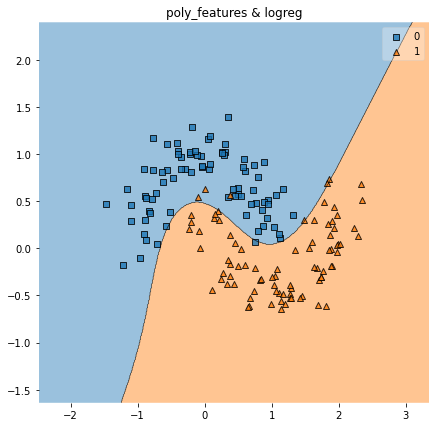

poly_features & logreg f1 =  0.9575601724604332


In [7]:
clf = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression())])
clf.fit(X_train, y_train)
    
plt.figure(figsize=(7, 7))
plt.title('poly_features & logreg')
plot_decision_regions(X_test, y_test, clf)
plt.show()
print("poly_features & logreg f1 = ", f1_score(y_test, clf.predict(X_test), average='weighted'))

Тут просто логрег с полиномиальными признаками степени 3 (так как до этого выяснили что это лучшая степень для моделей с полиномиальным ядром)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

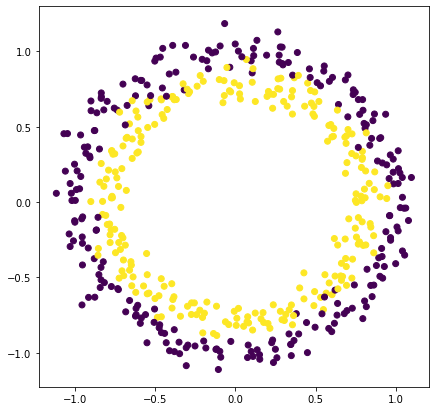

In [8]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(7, 7))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

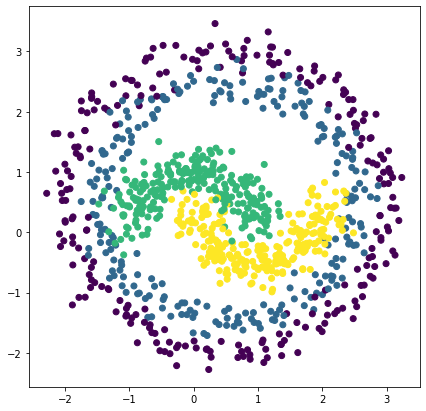

In [9]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

C:\Users\zuden\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zuden\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


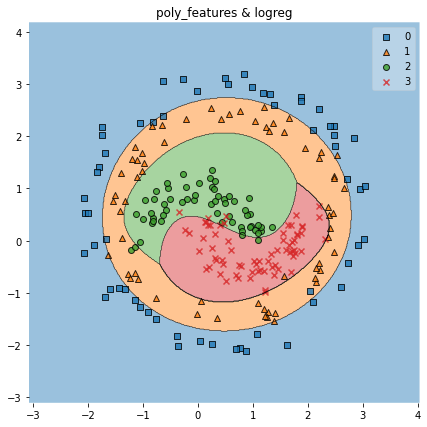

poly_features & logreg f1 =  0.9401109886749782


C:\Users\zuden\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


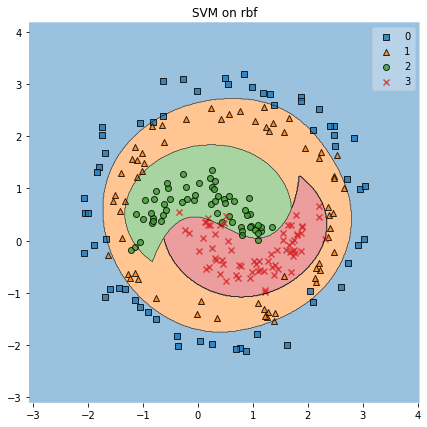

SVM on rbf f1 =  0.936080615942029


In [10]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.25, random_state = 42)

clf_lin = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression(C=5))])
clf_svm = SVC(kernel='rbf', C=3)

models = zip(['poly_features & logreg', 'SVM on rbf'], [clf_lin, clf_svm])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.figure(figsize=(7, 7))
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average='weighted'))

Если осознанно строить новые признаки, то можно заметно улучшить качество моделей. Однако SVM с ядром rbf тоже достаточно неплох, потому что способен без посторения новых признаков хорошо находить разделяющую поверхность.